In [1]:
## Clustering

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
crime=pd.read_csv("D:/Data Science/Assignments/clustering/crime_data - Copy.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [7]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
df_norm=norm_func(crime.iloc[:,1:])
df_norm

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


# Hierarchy Clustering

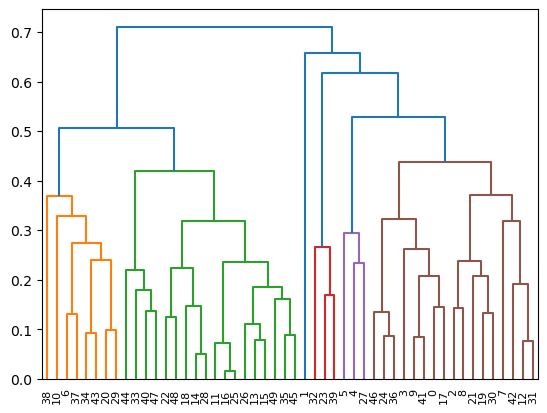

In [9]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [10]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [11]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [12]:
crime['h_clusterid']=hc.labels_
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,1


# K means

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [15]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [16]:
df_norm=norm_func(crime.iloc[:,1:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


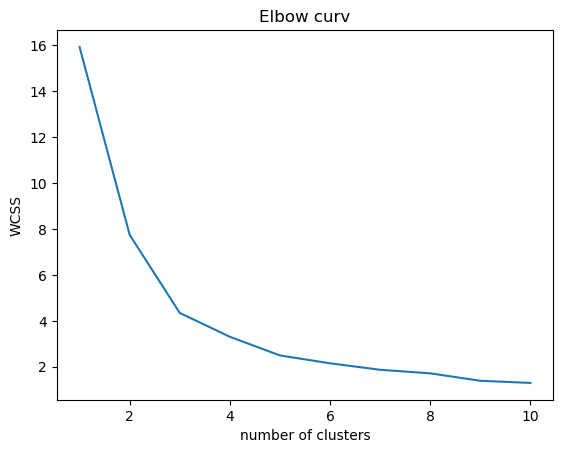

In [17]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 3, 1, 2, 1, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1])

In [19]:
x=pd.Series(model.labels_)
crime['Clust']=x
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,0,0
2,8.1,294,80,31.0,0,0
3,8.8,190,50,19.5,1,1
4,9.0,276,91,40.6,0,0
5,7.9,204,78,38.7,0,0
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,1,1
8,15.4,335,80,31.9,0,0
9,17.4,211,60,25.8,1,1


In [20]:
crime.iloc[:,1:5].groupby(crime.Clust).mean()

,Assault,UrbanPop,Rape,h_clusterid
Clust,,,,
0,264.000000,76.500000,33.608333,0.0
1,148.040000,69.560000,19.460000,1.0
2,79.400000,48.300000,11.610000,2.0
3,291.666667,45.666667,18.566667,0.0


# DBSCAN

In [22]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [23]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [24]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust,clusters
0,13.2,236,58,21.2,1,1,0
1,10.0,263,48,44.5,0,0,-1
2,8.1,294,80,31.0,0,0,-1
3,8.8,190,50,19.5,1,1,-1
4,9.0,276,91,40.6,0,0,-1
5,7.9,204,78,38.7,0,0,-1
6,3.3,110,77,11.1,1,1,1
7,5.9,238,72,15.8,1,1,-1
8,15.4,335,80,31.9,0,0,-1
9,17.4,211,60,25.8,1,1,-1


In [25]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
,,mean,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,0.222222,0.555556
1,0,14.050000,238.000000,57.750000,23.200000,0.750000,1.500000
2,1,4.825000,112.035714,63.357143,16.107143,1.357143,1.357143


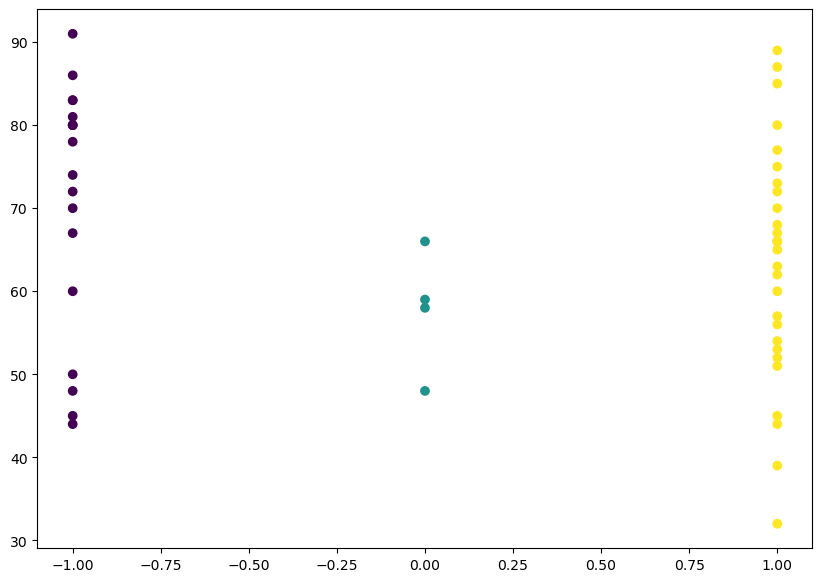

In [26]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 